In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cargar `Propuestas_PDI_MUIA.csv`

Valores booleanos no tienen porque ser correctos. Editar CSV si es necesario.

In [2]:
df_PDF_page = pd.read_csv('Propuestas_PDI_MUIA.csv', sep=';')

df_PDF_page["Nombre"] = df_PDF_page["Nombre"].astype("string")
df_PDF_page_boolean_cols = list(set(df_PDF_page.select_dtypes(include='object').columns) - set("Nombre"))
for col in df_PDF_page_boolean_cols:
    df_PDF_page[col] = df_PDF_page[col].astype('boolean').fillna(False)
    
df_PDF_page.head()

,PDF_page,Nombre,Vision Artificial,DeepLearning,CNN,LLM,Ciberseguridad,NLP,Finanzas,Industria/Agricultura,Astronomia,Electricidad,Etica/normativo,GANs,Sentimientos
0,1,REDES GENERATIVAS DE APRENDIZAJE PROFUNDO PARA...,True,True,False,False,False,False,False,False,True,False,False,False,False
1,3,TÉCNICAS DE EXPLICABILIDAD EN REDES DE APRENDI...,True,True,False,False,False,False,False,False,True,False,False,False,False
2,5,APRENDIZAJE PROFUNDO SEMI SUPERVISADO EN SEÑAL...,True,True,False,False,False,False,False,False,True,False,False,False,False
3,8,Preprocesado y clasificación no supervisada de...,True,False,False,False,False,False,False,False,False,False,False,False,False
4,11,Implementación de algoritmos basados en inteli...,True,False,False,False,True,False,False,False,False,False,False,False,False


In [3]:
df_PDF_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PDF_page               50 non-null     int64  
 1   Nombre                 50 non-null     string 
 2   Vision Artificial      50 non-null     boolean
 3   DeepLearning           50 non-null     boolean
 4   CNN                    50 non-null     boolean
 5   LLM                    50 non-null     boolean
 6   Ciberseguridad         50 non-null     boolean
 7   NLP                    50 non-null     boolean
 8   Finanzas               50 non-null     boolean
 9   Industria/Agricultura  50 non-null     boolean
 10  Astronomia             50 non-null     boolean
 11  Electricidad           50 non-null     boolean
 12  Etica/normativo        50 non-null     boolean
 13  GANs                   50 non-null     boolean
 14  Sentimientos           50 non-null     boolean
dtypes: boole

## Cargar `candidates.csv` (ó cargar `candidates_template.csv`)

En vez de `candidates_template.csv` cargar `candidates_template.csv` para comparar con TFMs aplicados reales.

In [4]:
if True:
    df = pd.read_csv('candidates_template.csv', sep=';')
else:
    df = pd.read_csv('candidates.csv', sep=';')

df.tail(8)

,PDF_page,TeamName-unique,Name,Bachelors,Masters,Doctors,JobExperience,Bonus,LinkedIn,Comments_in_double_quotes
27,25,3Bachs1.5Masters0.5Docs9.5yearsExperience,Name28,1.0,0.0,0.0,3.5,0,NaN,NaN
28,25,3Bachs1.5Masters0.5Docs9.5yearsExperience,Name29,1.0,0.5,0.0,3.0,0,NaN,TFM sobre industria y mi master va sobre traum...
29,25,3Bachs1.5Masters0.5Docs9.5yearsExperience,Name30,1.0,0.5,0.5,3.0,0,NaN,TFM sobre industria y mi master y doc son en h...
30,27,2Bachs1Master,Name31,1.0,0.0,0.0,3.0,-10,NaN,Propuesta de solo 2 miembros tiene bonus negativo
31,27,2Bachs1Master,Name32,1.0,1.0,0.0,3.0,0,NaN,NaN
32,5,3Bachs3Masters,Name33,1.0,1.0,0.0,3.0,0,NaN,NaN
33,5,3Bachs3Masters,Name34,1.0,1.0,0.0,3.0,0,NaN,NaN
34,5,3Bachs3Masters,Name35,1.0,1.0,0.0,3.0,0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PDF_page                   35 non-null     int64  
 1   TeamName-unique            35 non-null     object 
 2   Name                       35 non-null     object 
 3   Bachelors                  35 non-null     float64
 4   Masters                    35 non-null     float64
 5   Doctors                    35 non-null     float64
 6   JobExperience              35 non-null     float64
 7   Bonus                      35 non-null     int64  
 8   LinkedIn                   1 non-null      object 
 9   Comments_in_double_quotes  5 non-null      object 
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ KB


### Aggregated DataFrame

In [6]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('PDF_page')
numeric_cols

['Bachelors', 'Masters', 'Doctors', 'JobExperience', 'Bonus']

In [7]:
df_by_team = df.groupby(['TeamName-unique', 'PDF_page'])[numeric_cols].sum().reset_index()

df_by_team.tail(6)

,TeamName-unique,PDF_page,Bachelors,Masters,Doctors,JobExperience,Bonus
6,3Bachs1Master_21yearsExperience,8,3.0,1.0,0.0,21.0,0
7,3Bachs2Masters1Doc,5,3.0,2.0,1.0,9.0,0
8,3Bachs3Masters,5,3.0,3.0,0.0,9.0,0
9,3Bachs_15yearsExperience,11,3.0,0.0,0.0,15.0,0
10,3Bachs_HijoDelPresidenteCFInventado1,13,3.0,0.0,0.0,9.0,20
11,3Bachs_HijoDelPresidenteCFInventado2,17,3.0,0.0,0.0,9.0,30


## Pesos de cada campo

In [8]:
# Editar COMO CADA UNO QUIERA
pesos = dict(
    Bachelors = 1 ,  # (float, ver nota1). Nº de GRADOS universitarios (oficiales)
    Masters = 2 ,    # (float, ver nota1). Nº de MASTERS universitarios (oficiales) 
    Doctors = 3 ,    # (float, ver nota1). Nº de DOCTORADOS universitarios (oficiales)   
    JobExperience = 0.5 ,  # (float, ver nota1). Anios de experiencia (contando prácticas)
    Bonus = 1 ,  # (float, ver nota1) Admissions_Advantage_Score. Ej. hijo del Presidente bonus de +100 ptos por ejemplo
)
# Nota 1: Pueden ser float, ver comentarios de siguiente celda 

In [24]:
# Mostar columna de comments entera
with pd.option_context('display.max_colwidth', None):
    display(df[::-1])

,PDF_page,TeamName-unique,Name,Bachelors,Masters,Doctors,JobExperience,Bonus,LinkedIn,Comments_in_double_quotes
34,5,3Bachs3Masters,Name35,1.0,1.0,0.0,3.0,0,NaN,NaN
33,5,3Bachs3Masters,Name34,1.0,1.0,0.0,3.0,0,NaN,NaN
32,5,3Bachs3Masters,Name33,1.0,1.0,0.0,3.0,0,NaN,NaN
31,27,2Bachs1Master,Name32,1.0,1.0,0.0,3.0,0,NaN,NaN
30,27,2Bachs1Master,Name31,1.0,0.0,0.0,3.0,-10,NaN,Propuesta de solo 2 miembros tiene bonus negativo
29,25,3Bachs1.5Masters0.5Docs9.5yearsExperience,Name30,1.0,0.5,0.5,3.0,0,NaN,TFM sobre industria y mi master y doc son en historia
28,25,3Bachs1.5Masters0.5Docs9.5yearsExperience,Name29,1.0,0.5,0.0,3.0,0,NaN,TFM sobre industria y mi master va sobre traumatologia
27,25,3Bachs1.5Masters0.5Docs9.5yearsExperience,Name28,1.0,0.0,0.0,3.5,0,NaN,NaN
26,23,3Bachs1.5Masters,Name27,1.0,1.5,0.0,3.0,0,NaN,TFM sobre Astrofisica y mi master hice practicas en el CERN
25,23,3Bachs1.5Masters,Name26,1.0,0.0,0.0,3.0,0,NaN,NaN


In [9]:
# Keys exactly match numeric_cols
assert set(pesos.keys()) == set(numeric_cols)

## `pesos` x `df_by_team`

In [10]:
weights = pd.Series(pesos)
df_by_team['weighted_score'] = df_by_team[list(pesos)].dot(weights)

df_by_team_weight_sorted = df_by_team.sort_values('weighted_score')

In [12]:
numeric_cols += ['weighted_score']

In [13]:
# Cada columna su propio gradient
def highlight_numeric_cols_custome(df, subset, cmap='coolwarm', format_prec = '{:.1f}', vmin=None):           
    df_style = df.style.background_gradient(
        cmap=cmap, 
        subset=subset,
        vmin=vmin, # Pass vmin=0 if boolean df
    ).format({**{col: format_prec for col in subset}}).hide(axis='index')
    return df_style

In [14]:
highlight_numeric_cols_custome(df_by_team_weight_sorted, numeric_cols)

TeamName-unique,PDF_page,Bachelors,Masters,Doctors,JobExperience,Bonus,weighted_score
2Bachs1Master,27,2.0,1.0,0.0,6.0,-10.0,-3.0
3Bachs,1,3.0,0.0,0.0,9.0,0.0,7.5
3.5Bachs,20,3.5,0.0,0.0,9.0,0.0,8.0
3Bachs1Master,3,3.0,1.0,0.0,9.0,0.0,9.5
3Bachs1.5Masters,23,3.0,1.5,0.0,9.0,0.0,10.5
3Bachs_15yearsExperience,11,3.0,0.0,0.0,15.0,0.0,10.5
3Bachs1.5Masters0.5Docs9.5yearsExperience,25,3.0,1.0,0.5,9.5,0.0,11.2
3Bachs3Masters,5,3.0,3.0,0.0,9.0,0.0,13.5
3Bachs2Masters1Doc,5,3.0,2.0,1.0,9.0,0.0,14.5
3Bachs1Master_21yearsExperience,8,3.0,1.0,0.0,21.0,0.0,15.5


In [15]:
highlight_numeric_cols_custome(df_by_team_weight_sorted, numeric_cols, 'Greens', '{:.0f}')

TeamName-unique,PDF_page,Bachelors,Masters,Doctors,JobExperience,Bonus,weighted_score
2Bachs1Master,27,2,1,0,6,-10,-3
3Bachs,1,3,0,0,9,0,8
3.5Bachs,20,4,0,0,9,0,8
3Bachs1Master,3,3,1,0,9,0,10
3Bachs1.5Masters,23,3,2,0,9,0,10
3Bachs_15yearsExperience,11,3,0,0,15,0,10
3Bachs1.5Masters0.5Docs9.5yearsExperience,25,3,1,0,10,0,11
3Bachs3Masters,5,3,3,0,9,0,14
3Bachs2Masters1Doc,5,3,2,1,9,0,14
3Bachs1Master_21yearsExperience,8,3,1,0,21,0,16


In [16]:
# Ordena por pg TFMs
highlight_numeric_cols_custome(df_by_team.sort_values('PDF_page'), numeric_cols, 'Greens', '{:.0f}')

TeamName-unique,PDF_page,Bachelors,Masters,Doctors,JobExperience,Bonus,weighted_score
3Bachs,1,3,0,0,9,0,8
3Bachs1Master,3,3,1,0,9,0,10
3Bachs2Masters1Doc,5,3,2,1,9,0,14
3Bachs3Masters,5,3,3,0,9,0,14
3Bachs1Master_21yearsExperience,8,3,1,0,21,0,16
3Bachs_15yearsExperience,11,3,0,0,15,0,10
3Bachs_HijoDelPresidenteCFInventado1,13,3,0,0,9,20,28
3Bachs_HijoDelPresidenteCFInventado2,17,3,0,0,9,30,38
3.5Bachs,20,4,0,0,9,0,8
3Bachs1.5Masters,23,3,2,0,9,0,10


## Caso práctico: TFMs de astronomia

In [17]:
df_TFM_Astronomia = df_PDF_page[df_PDF_page["Astronomia"]]
df_TFM_Astronomia

,PDF_page,Nombre,Vision Artificial,DeepLearning,CNN,LLM,Ciberseguridad,NLP,Finanzas,Industria/Agricultura,Astronomia,Electricidad,Etica/normativo,GANs,Sentimientos
0,1,REDES GENERATIVAS DE APRENDIZAJE PROFUNDO PARA...,True,True,False,False,False,False,False,False,True,False,False,False,False
1,3,TÉCNICAS DE EXPLICABILIDAD EN REDES DE APRENDI...,True,True,False,False,False,False,False,False,True,False,False,False,False
2,5,APRENDIZAJE PROFUNDO SEMI SUPERVISADO EN SEÑAL...,True,True,False,False,False,False,False,False,True,False,False,False,False
22,53,Rayos cósmicos y gamma bajo la lupa del Observ...,True,False,False,False,False,False,False,False,True,False,False,False,False


In [18]:
highlight_numeric_cols_custome(df_TFM_Astronomia, df_PDF_page_boolean_cols, 'Greens', '{:.0f}', vmin=0)

PDF_page,Nombre,Vision Artificial,DeepLearning,CNN,LLM,Ciberseguridad,NLP,Finanzas,Industria/Agricultura,Astronomia,Electricidad,Etica/normativo,GANs,Sentimientos
1,REDES GENERATIVAS DE APRENDIZAJE PROFUNDO PARA MEJORA DE SEÑAL ASTRONÓMICA,1,1,0,0,0,0,0,0,1,0,0,0,0
3,TÉCNICAS DE EXPLICABILIDAD EN REDES DE APRENDIZAJE PROFUNDO PARA CLASIFICACIÓN Y DETECCIÓN DE ANOMALÍAS EN IMAGEN ASTRONÓMICA,1,1,0,0,0,0,0,0,1,0,0,0,0
5,APRENDIZAJE PROFUNDO SEMI SUPERVISADO EN SEÑAL MULTICANAL,1,1,0,0,0,0,0,0,1,0,0,0,0
53,Rayos cósmicos y gamma bajo la lupa del Observatorio SWGOWide-field Gamma-ray Observatory),1,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
df_TFM_Astronomia_pgs_name = df_TFM_Astronomia[['PDF_page','Nombre']]
df_TFM_Astronomia_pgs = df_TFM_Astronomia_pgs_name['PDF_page'].tolist()
df_TFM_Astronomia_pgs

[1, 3, 5, 53]

In [20]:
df_by_team_weight_sorted_ASTRONOMIA = df_by_team_weight_sorted[
    df_by_team_weight_sorted["PDF_page"].isin(df_TFM_Astronomia_pgs)
]

highlight_numeric_cols_custome(df_by_team_weight_sorted_ASTRONOMIA, numeric_cols, 'Greens', '{:.1f}')

TeamName-unique,PDF_page,Bachelors,Masters,Doctors,JobExperience,Bonus,weighted_score
3Bachs,1,3.0,0.0,0.0,9.0,0.0,7.5
3Bachs1Master,3,3.0,1.0,0.0,9.0,0.0,9.5
3Bachs3Masters,5,3.0,3.0,0.0,9.0,0.0,13.5
3Bachs2Masters1Doc,5,3.0,2.0,1.0,9.0,0.0,14.5


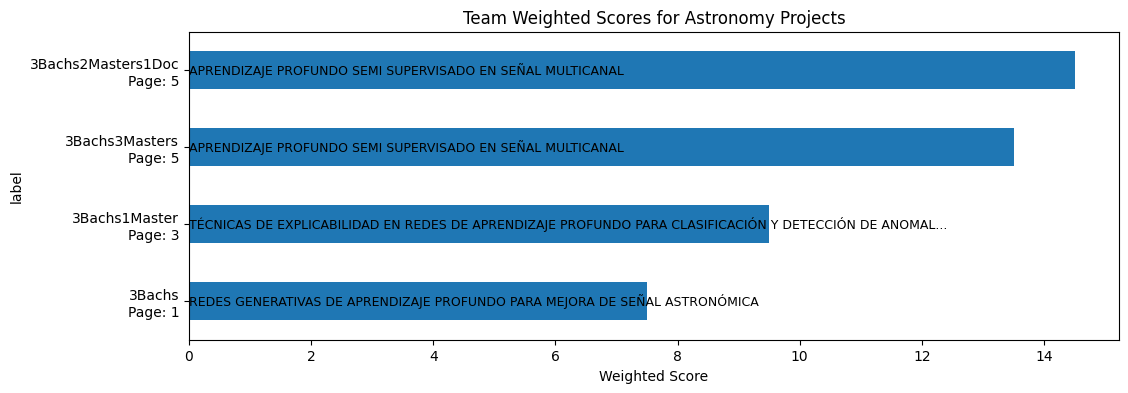

In [21]:
df_plot = df_by_team_weight_sorted_ASTRONOMIA[['TeamName-unique', 'PDF_page', 'weighted_score']].copy()
df_plot = df_plot.merge(df_TFM_Astronomia_pgs_name, on='PDF_page', how='left') # merge
df_plot['label'] = df_plot['TeamName-unique'] + '\n' + 'Page: ' + df_plot['PDF_page'].astype(str)
df_plot = df_plot.set_index('label')

# Elige como ordenar, por puntos o por mismo TFM
if True:
    df_plot = df_plot.sort_values('weighted_score', ascending=True)
else:
    df_plot = df_plot.sort_values('PDF_page', ascending=True)

# Simple bar plot
ax = df_plot['weighted_score'].plot(kind='barh', figsize=(12, 4), legend=False)
ax.set_xlabel('Weighted Score')
ax.set_title('Team Weighted Scores for Astronomy Projects')

# Add Nombre [del TFM] at the left of each bar
n_chars = 100
for i, (idx, row) in enumerate(df_plot.iterrows()):
    # Get first `n_chars` chars of Nombre
    nombre_short = str(row['Nombre'])[:n_chars]
    if len(str(row['Nombre'])) > n_chars:
        nombre_short += "..."    
    # Add text at the left (x=0) position
    ax.text(0, i, nombre_short, va='center', ha='left', fontsize=9)

Barplot los equpipos se llaman tal que *3Bachs1Master*, ideal para ver en este template que los valores encajan. Pero en `candidates.csv` cda equipo puede poner el nombre que quiera (si es un nombre no ya usado por otro equipo).

Para compararme con estas competencias he de:
1. Introducir en `candidates.csv` los registros de cada miembro de mi equipo (mismo `TeamName-unique`; y mismo `PDF_page` de astronomia por ejemplo valores solo [1, 3, 5, 53]).
2. Simplemente volver a correr todo el notebook